<a href="https://colab.research.google.com/github/Mwangi-Jeff/AI-Coursework-2025/blob/main/PracticalAssignment5%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

Saving Airplane_Crashes_and_Fatalities_Since_1908.csv to Airplane_Crashes_and_Fatalities_Since_1908 (2).csv


Determine the number of rows and columns in the dataset.

In [8]:
print("Number of rows", df.shape[0])
print("Number of columns", df.shape[1])

Number of rows 5268
Number of columns 13


Display the last 75 rows in the dataset

In [6]:
display(df.tail(75))

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
5193,03/15/2008,08:15,"Nbagu, Nigeria",Trade Wings Aviation Ltd.,NaN,Lagos - Bebi Air Strip,Beechcraft 1900D,5N-JAH,UE-322,3.0,3.0,0.0,The plane crashed while en route. Wreckage was...
5194,04/03/2008,11:00,"Lawa, Suriname",Blue Wing Airlines,NaN,Paramaribo - Lawa,Antonov An-28,PZ-TSO,1AJ007-17,19.0,19.0,0.0,While attempting to land the crew aborted the ...
5195,04/09/2008,23:27,"Bundeena, Australia",Avtex Air Services,NaN,Sydney - Brisbane,Swearingen SA227AC Metroliner III,VH-OZA,AC-600,1.0,1.0,0.0,The pilot of the mail plane reported some mino...
5196,04/11/2008,22:15,"Chrisinau, Moldova",Kata Transportation,NaN,"Chrisinau, Moldova - Antalya, Turkey - Sudan",Antonov An-32,ST-AZL,3009,8.0,8.0,0.0,Just minutes after the take off the plane trie...
5197,04/15/2008,14:30,"Goma, Congo",Hewa Bora Airways,NaN,Goma - Kisangani - Kinshasa,McDonnell Douglas DC-9-51,9Q-CHN,47731,85.0,0.0,47.0,"While attempting to takeoff, the plane failed ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


Create a new dataframe from the raw/uncleaned data called ‘fatality_locations’ with the following columns: ‘Date’, ‘Location’, ‘Aboard’, ‘Fatalities’.

In [9]:
fatality_locations = df[['Date', 'Location', 'Aboard', 'Fatalities']]
display(fatality_locations.head())

,Date,Location,Aboard,Fatalities
0,09/17/1908,"Fort Myer, Virginia",2.0,1.0
1,07/12/1912,"AtlantiCity, New Jersey",5.0,5.0
2,08/06/1913,"Victoria, British Columbia, Canada",1.0,1.0
3,09/09/1913,Over the North Sea,20.0,14.0
4,10/17/1913,"Near Johannisthal, Germany",30.0,30.0


Determine the date of the highest number of recorded fatalities from this new dataframe.

In [10]:
max_fatalities_row = fatality_locations.loc[fatality_locations['Fatalities'].idxmax()]
date_of_max_fatalities = max_fatalities_row['Date']
print(f"The date with the highest number of recorded fatalities is: {date_of_max_fatalities}")

The date with the highest number of recorded fatalities is: 03/27/1977


Compare the number of passengers aboard to the number of fatalities per crash. Are
there any recorded crashes where there were no fatalities? If so, how many?


In [11]:
# Compare Aboard and Fatalities
display(fatality_locations[['Aboard', 'Fatalities']].head())

# Find crashes with no fatalities
no_fatalities = fatality_locations[fatality_locations['Fatalities'] == 0]

# Count the number of crashes with no fatalities
num_no_fatalities = len(no_fatalities)

print(f"\nThere are {num_no_fatalities} recorded crashes with no fatalities.")

,Aboard,Fatalities
0,2.0,1.0
1,5.0,5.0
2,1.0,1.0
3,20.0,14.0
4,30.0,30.0



There are 58 recorded crashes with no fatalities.


In the ‘fatality_locations’ dataframe, the location column has data items
represented as ‘Region, U.S. State/Country’. Split this column to have two columns
of regions and states/countries.


In [12]:
fatality_locations[['Region', 'State/Country']] = fatality_locations['Location'].str.split(',', expand=True, n=1)
display(fatality_locations.head())

/tmp/ipython-input-3600786968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatality_locations[['Region', 'State/Country']] = fatality_locations['Location'].str.split(',', expand=True, n=1)
/tmp/ipython-input-3600786968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatality_locations[['Region', 'State/Country']] = fatality_locations['Location'].str.split(',', expand=True, n=1)


,Date,Location,Aboard,Fatalities,Region,State/Country
0,09/17/1908,"Fort Myer, Virginia",2.0,1.0,Fort Myer,Virginia
1,07/12/1912,"AtlantiCity, New Jersey",5.0,5.0,AtlantiCity,New Jersey
2,08/06/1913,"Victoria, British Columbia, Canada",1.0,1.0,Victoria,"British Columbia, Canada"
3,09/09/1913,Over the North Sea,20.0,14.0,Over the North Sea,None
4,10/17/1913,"Near Johannisthal, Germany",30.0,30.0,Near Johannisthal,Germany


Order the dataframe by the number of fatalities from highest to lowest and select the
first 100

In [13]:
fatality_locations_sorted = fatality_locations.sort_values(by='Fatalities', ascending=False)
top_100_fatalities = fatality_locations_sorted.head(100)
display(top_100_fatalities)

,Date,Location,Aboard,Fatalities,Region,State/Country
2963,03/27/1977,"Tenerife, Canary Islands",644.0,583.0,Tenerife,Canary Islands
3568,08/12/1985,"Mt. Osutaka, near Ueno Village, Japan",524.0,520.0,Mt. Osutaka,"near Ueno Village, Japan"
4455,11/12/1996,"Near Charkhidadri, India",349.0,349.0,Near Charkhidadri,India
2726,03/03/1974,"Near Ermenonville, France",346.0,346.0,Near Ermenonville,France
3562,06/23/1985,"AtlantiOcean, 110 miles West of Ireland",329.0,329.0,AtlantiOcean,110 miles West of Ireland
...,...,...,...,...,...,...
4852,04/15/2002,"Busan, South Korea",166.0,128.0,Busan,South Korea
3198,01/21/1980,"Elburz Mtns., near Laskarak, Markazi, Iran",128.0,128.0,Elburz Mtns.,"near Laskarak, Markazi, Iran"
1701,12/16/1960,"Staten Island / Brooklyn, New York",128.0,128.0,Staten Island / Brooklyn,New York
5108,07/09/2006,"Irkutsk, Russia",203.0,128.0,Irkutsk,Russia


Generate a pie chart that shows the distribution of the top 25 number of fatalities
per country/U.S. State.

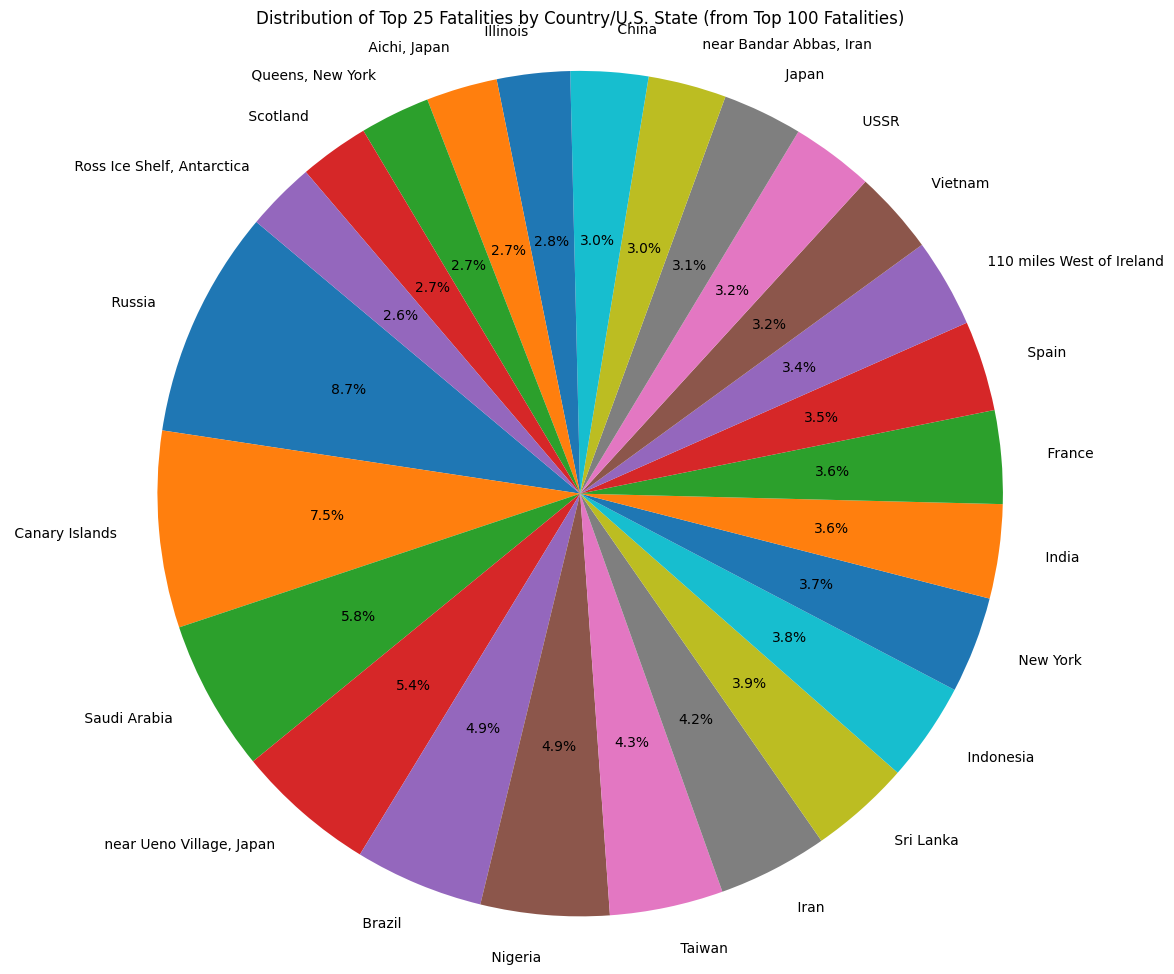

In [14]:
import matplotlib.pyplot as plt

# Group by State/Country and sum the fatalities for the top 100 fatalities
fatalities_by_country = top_100_fatalities.groupby('State/Country')['Fatalities'].sum().sort_values(ascending=False)

# Select the top 25
top_25_fatalities_by_country = fatalities_by_country.head(25)

# Generate a pie chart
plt.figure(figsize=(12, 12))
plt.pie(top_25_fatalities_by_country, labels=top_25_fatalities_by_country.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 25 Fatalities by Country/U.S. State (from Top 100 Fatalities)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()